# Folium

- 지도 오타쿠
- 지도 시각화에 유용한 도구
- 세계 지도를 기본 지원하고 다양한 스타일의 지도 이미지를 제공

In [1]:
import pandas as pd
import folium # pip install folium
import json

In [2]:
# 배가 고프다

## 지도 만들기

- Map() 함수를 이용하여 지도 객체 생성

- 지도 화면은 줌과 이동기능을 지원

- folium 은 웹 기반 지도를 만들어 웹 기반 IDE 에서는 지도 객체를 바로 확인 할 수 있고, 웹 기반이 아니면 html 파일로 저장하고 확인

In [14]:
# 서울 지도 만들기 
seoul_map = folium.Map(
    location = [37.55, 126.98], # 위도,경도
    zoom_start = 12, # 처음 지도 만들때 시작할 위치 크면클수록 줌인됨
)

In [15]:
seoul_map

In [9]:
# 지도를 html 파일로 저장하기
seoul_map.save("seoul.html")

## 지도 스타일 적용

- Map()  함수에 tiles 옵션을 적용하여 스타일을 변경할 수 있음

In [22]:
seoul_map2 = folium.Map(
    location = [37.55, 126.98], # 위도,경도
    zoom_start = 12, # 처음 지도 만들때 시작할 위치 크면클수록 줌인됨
    tiles="Cartodb dark_matter",
)

In [23]:
seoul_map2

## 지도에 마커 표시하기

In [27]:
df = pd.read_excel("./data/서울지역 대학교 위치.xlsx", index_col = 0)
df.head()

,위도,경도
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610


In [33]:
# 대학교 위치 정보를 Marker 로 표시
for idx, row in df.iterrows(): # iterrows 각각의 행을 반복객체로 만들어줌
    # print(idx) # KAIST 서울캠퍼스 
    # print(row) # 위도     37.592573 경도    127.046737 : 시리즈~
    folium.Marker(
       [row["위도"], row["경도"]] ,
        popup = row.name # 마커를 클릭했을때 나타나는 정보
    ).add_to(seoul_map) # seoul_map 라는 객체에 추가해주겠다


In [34]:
seoul_map

## 지도에 원형 마커 표시

In [39]:
seoul_map = folium.Map(
    location = [37.55, 126.98],
    zoom_start = 12
)

In [40]:
for idx, row in df.iterrows():
    folium.CircleMarker(
        [row["위도"],row["경도"]],
        radius = 10, # 원의 반지름
        color = "brown", # 둘레
        fill = True,
        fill_color = "cora", # 색상
        fill_opacity = 0.7, # 투명도
        popup = idx
    ).add_to(seoul_map)

In [41]:
seoul_map

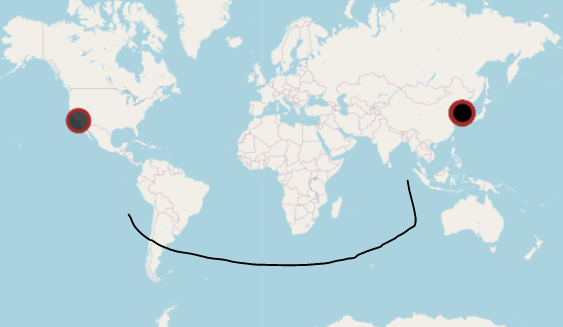

In [42]:
# 단계구분도!

## 지도 영역에 단계구분도(Choropleth Map) 표시하기

In [43]:
df = pd.read_excel("./data/경기도인구데이터.xlsx", index_col = "구분")
df.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932


In [44]:
geo_data = json.load(open("./data/경기도행정구역경계.json", encoding = "utf-8"))

In [57]:
g_map = folium.Map(location = [37.5502, 126.982], zoom_start = 9)

In [58]:
g_map

In [64]:
folium.Choropleth(
    geo_data = geo_data,
    data = df[2017], # 2017의 구분: {키:벨류}
    fill_color = "YlOrRd",
    fill_opacity = 0.7,
    line_opactiy = 0.3,
    threshold_scale = [10000,100000,300000,500000,700000], # 나누는 기준점
    key_on = "feature.properties.name", # 색칠해줄 기준 뭐 기준으로 합체 시킬래!!!!!!!!!!!!
                 ).add_to(g_map)

In [65]:
g_map